# Statistical Learning Project Census Data

## Load the Data and Initial Exploration

In [1]:

import pandas as pd

# Load the adult.data file
data_file_path = 'census+income/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data_df = pd.read_csv(data_file_path, names=columns, sep=',\s', na_values="?", engine='python')

# Display the first few rows of the dataset
data_df.head(7)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


*   It contains 15 columns, including demographic, work-related, and income information.
*   The columns are: `age`, `workclass`, `fnlwgt` (final weight), `education`, `education_num` (education number), `marital_status`, `occupation`, `relationship`, `race`, `sex`, `capital_gain`, `capital_loss`, `hours_per_week`, `native_country`, and `income`.
*   The `income` column, which is likely the target variable for predictive modeling, classifies individuals into two groups: `<=50K` and `>50K`.

In [2]:
# Load the adult.test file
test_file_path =  'census+income/adult.test'
# Skipping the first row as it might be a header or descriptive row based on common dataset patterns
test_df = pd.read_csv(test_file_path, names=columns, sep=',\s', na_values="?", engine='python', skiprows=1)

# Display the first few rows of the test dataset
test_df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


*   The `income` column values in the test dataset include a period (`.`) at the end (e.g., `<=50K.`, `>50K.`), unlike in the training dataset. This will need to be cleaned to ensure consistency between the two datasets.
*   There are missing values (`NaN`) in some columns, such as `workclass` and `occupation`, indicating that handling missing data will be an important part of the preprocessing.

## Data Cleaning and Preprocessing

Preliminary Analysis

In [3]:
# Summary statistics before cleaning and preprocessing
total_records = data_df.shape[0]
total_features = data_df.shape[1]
individuals_more_than_50k = data_df[data_df['income'] == '>50K'].shape[0]
individuals_at_most_50k = data_df[data_df['income'] == '<=50K'].shape[0]
percentage_more_than_50k = (individuals_more_than_50k / total_records) * 100

summary_before_cleaning = {
    "Total number of records": total_records,
    "Total number of features": total_features,
    "Individuals making more than $50k": individuals_more_than_50k,
    "Individuals making at most $50k": individuals_at_most_50k,
    "Percentage of individuals making more than $50k": percentage_more_than_50k,
}

summary_before_cleaning


{'Total number of records': 32561,
 'Total number of features': 15,
 'Individuals making more than $50k': 7841,
 'Individuals making at most $50k': 24720,
 'Percentage of individuals making more than $50k': 24.080955744602438}

In [4]:
# Step 2: Identify and Drop Unnecessary Columns
# Re-checking if 'education' column exists before attempting to drop
if 'education' in data_df.columns:
    data_df = data_df.drop(columns=['education'])
if 'education' in test_df.columns:
    test_df = test_df.drop(columns=['education'])

# Step 3: Remove Duplicates
data_df = data_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Step 4: Make Easier Access for Data by Dropping Spaces
data_df_dropped = data_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_df_dropped = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 5: Change Special Characters
# Making income column values consistent by removing periods
data_df['income'] = data_df_dropped['income'].str.replace('.', '')
test_df['income'] = test_df_dropped['income'].str.replace('.', '')



C:\Users\sapsh\AppData\Local\Temp\ipykernel_16300\727710006.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_df['income'] = data_df_dropped['income'].str.replace('.', '')
C:\Users\sapsh\AppData\Local\Temp\ipykernel_16300\727710006.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['income'] = test_df_dropped['income'].str.replace('.', '')


*   Total number of records: 32,537
*   Total number of features: 14 (after removing `education`)
*   Individuals making more than $50k: 7,839
*   Individuals making at most $50k: 24,698
*   Percentage of individuals making more than $50k: 24.09%

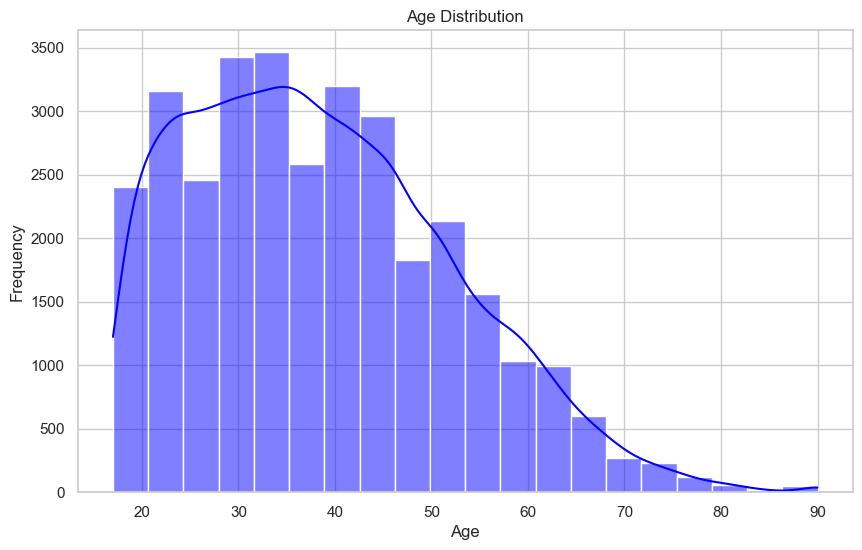

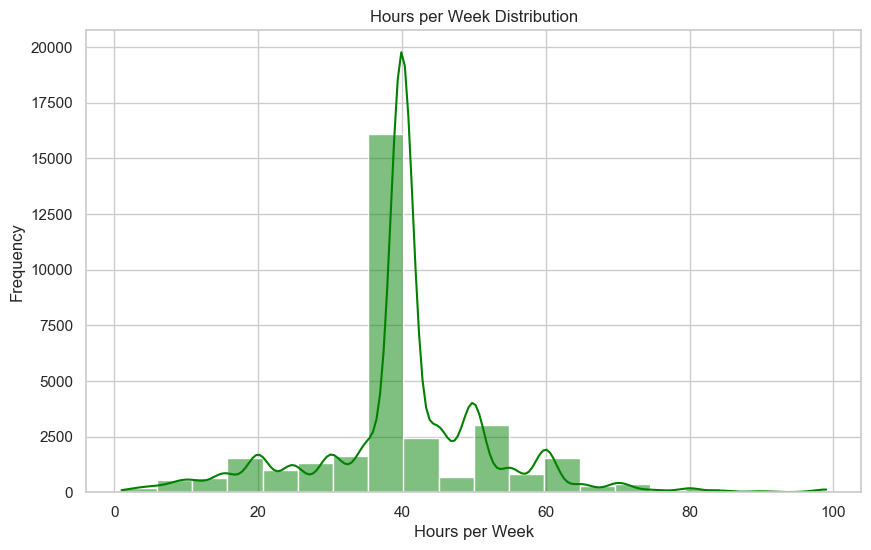

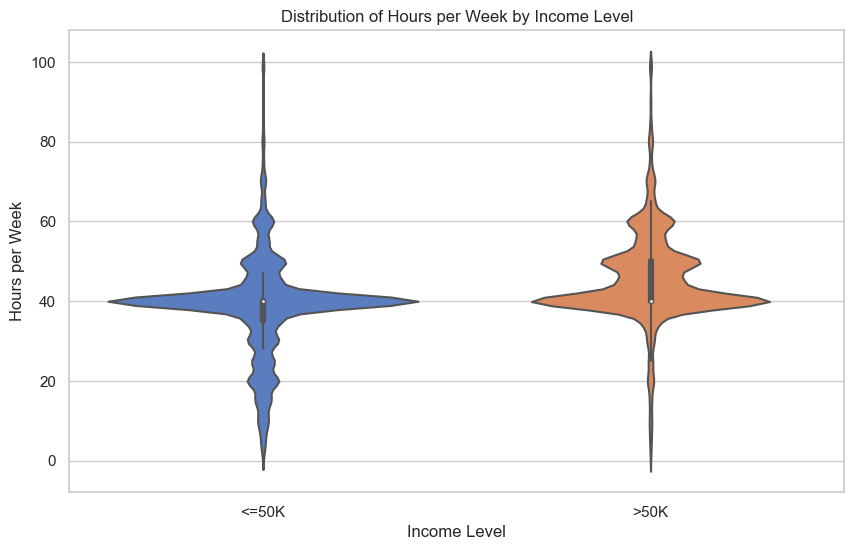

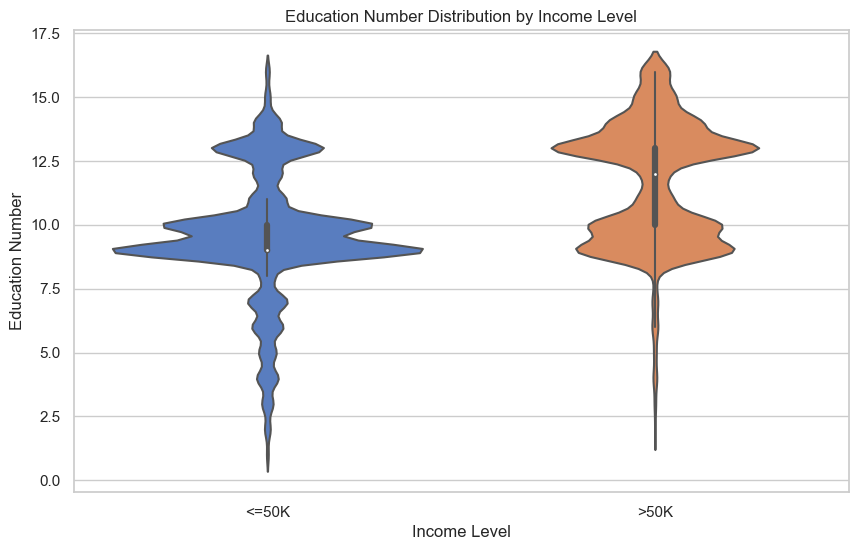

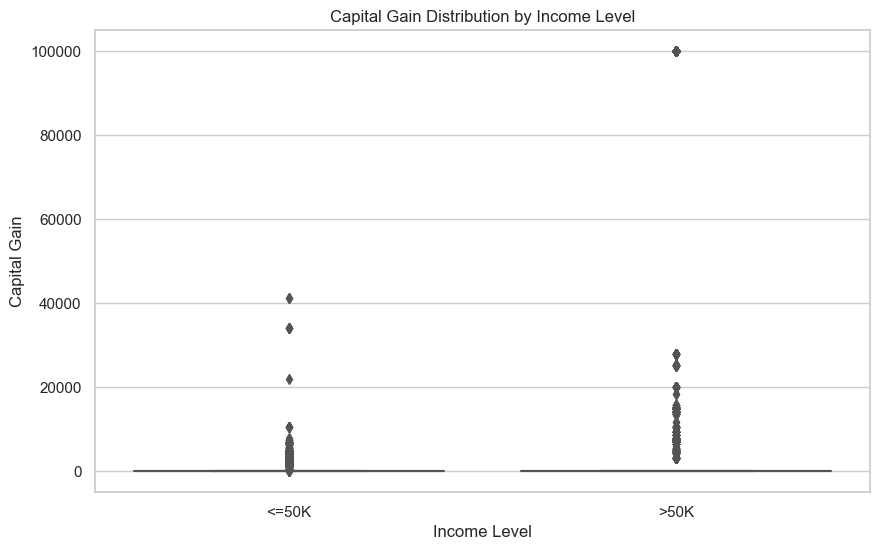

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#  Histogram for Hours per Week
plt.figure(figsize=(10, 6))
sns.histplot(data_df['hours_per_week'], bins=20, kde=True, color='green')
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


# 2. Violin Plot for hours per week across different income levels
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='hours_per_week', data=data_df, palette='muted')
plt.title('Distribution of Hours per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.show()

#  Violin Plot for Education Num vs. Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='education_num', data=data_df, palette='muted')
plt.title('Education Number Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Education Number')
plt.show()

# 3. Side-by-side Box Plot for capital gain across income levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital_gain', data=data_df, palette='muted')
plt.title('Capital Gain Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Capital Gain')
plt.show()


*   **Age Distribution**: The histogram shows the distribution of ages within the dataset, revealing a right-skewed pattern where a majority of the individuals are younger (20-40 years old).
    
*   **Distribution of Hours per Week by Income Level**: The violin plot illustrates the distribution of hours worked per week, segmented by income level. It indicates that individuals making more than $50k tend to work more hours, with a median close to the full-time workweek (40 hours). The distribution for those making at most $50k is slightly wider, suggesting a broader range of work hours.
    
*   **Capital Gain Distribution by Income Level**: The box plot for capital gain across income levels shows a significant presence of outliers, particularly among individuals earning more than $50k. This suggests that capital gain might be a distinguishing feature between the two income groups, though the majority of individuals in both groups have no or very low capital gain.
*   **Hours per Week Distribution**: This histogram shows a strong peak around the 40-hour mark, indicative of a standard full-time work week, with tails extending towards both lower and higher hours. There's a significant concentration of individuals working standard full-time hours, but also a notable portion working fewer or more hours.
    
*   **Education Number Distribution by Income Level**: The violin plot illustrates the distribution of education levels (as measured by the number of years of education) across different income levels. It's evident that individuals with higher education levels tend to be more concentrated in the higher income bracket (`>50K`), suggesting a positive correlation between education and income.



In [6]:
# Identifying numerical and categorical columns
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_df.select_dtypes(include=['object']).columns.drop('income')

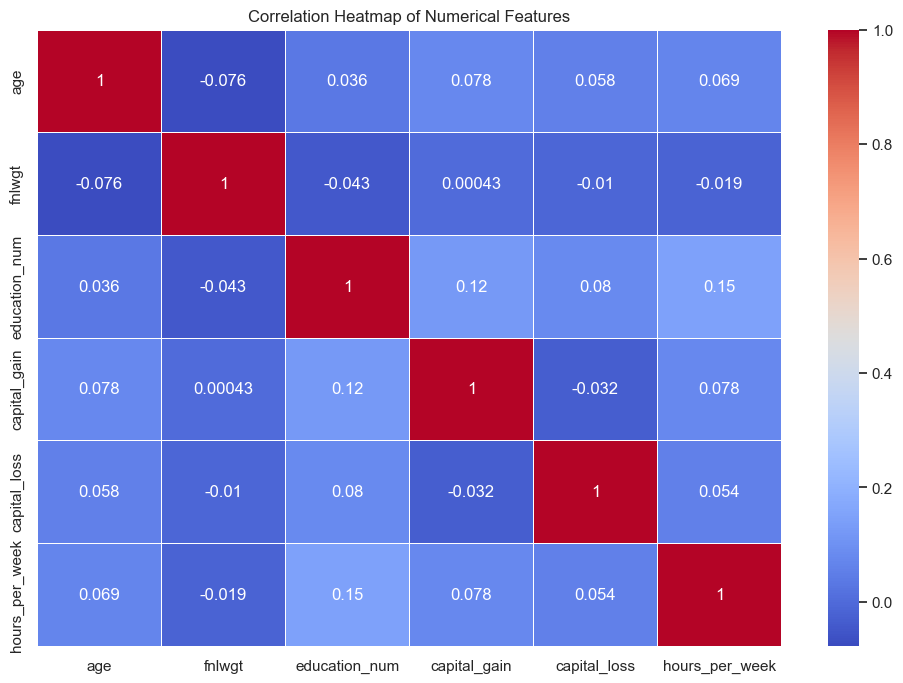

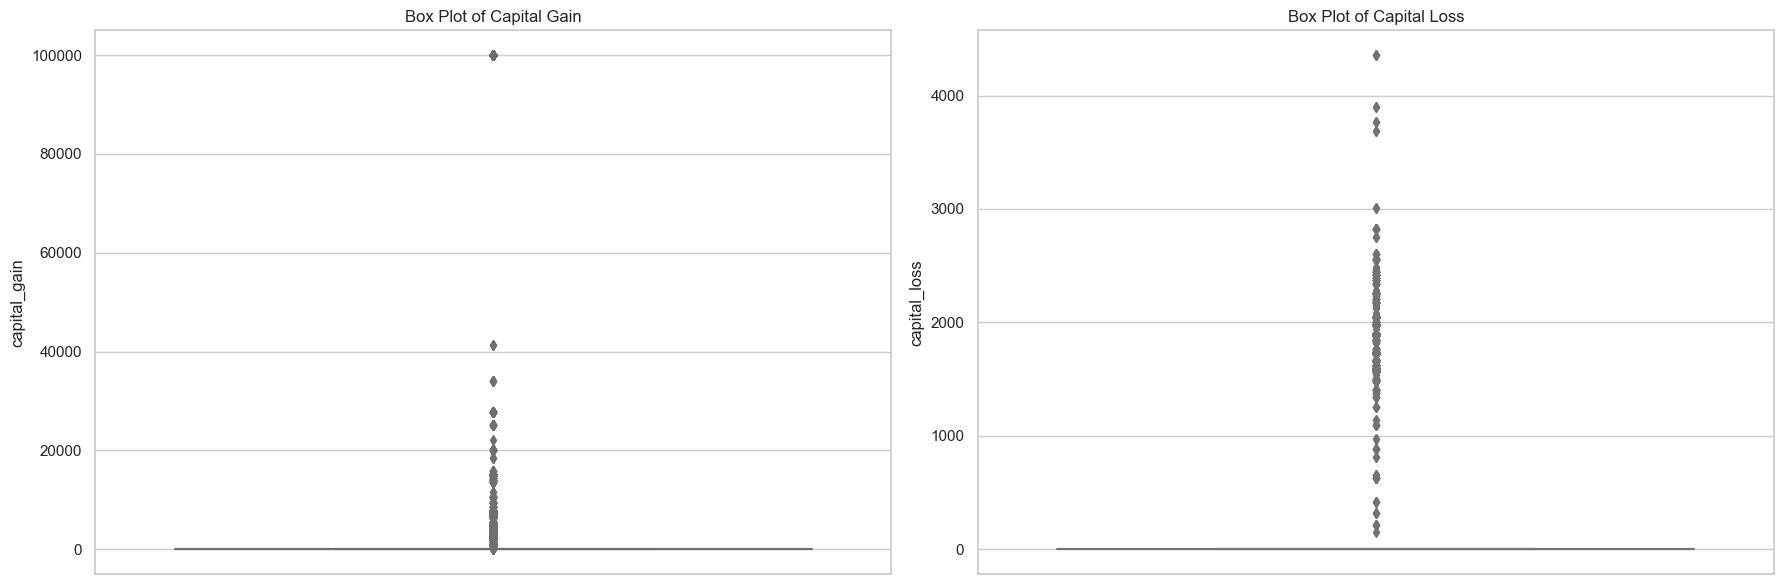

In [7]:
# Heatmap for Correlation Check among numerical features
correlation_matrix = data_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box Plot for Capital Gain and Capital Loss to check for outliers
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='capital_gain', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Capital Gain')

sns.boxplot(data=data_df, y='capital_loss', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Capital Loss')

plt.tight_layout()
plt.show()


### Correlation Heatmap:

*   The heatmap shows the correlations among numerical features. Most features have low to moderate correlations with each other, suggesting minimal multicollinearity issues for models that assume independence between features. Notably, `education_num` shows some level of positive correlation with `age`, which could indicate that higher educational attainment is associated with older age groups within this dataset.

### Box Plots for Capital Gain and Capital Loss:

*   **Capital Gain**: The box plot reveals a significant number of outliers, with the bulk of data concentrated at 0. This indicates that capital gains are not common among most individuals in the dataset, but when they do occur, they can vary greatly in amount.
*   **Capital Loss**: Similar to capital gain, most individuals have no capital loss (`capital_loss` = 0), but there are outliers with varying amounts of loss

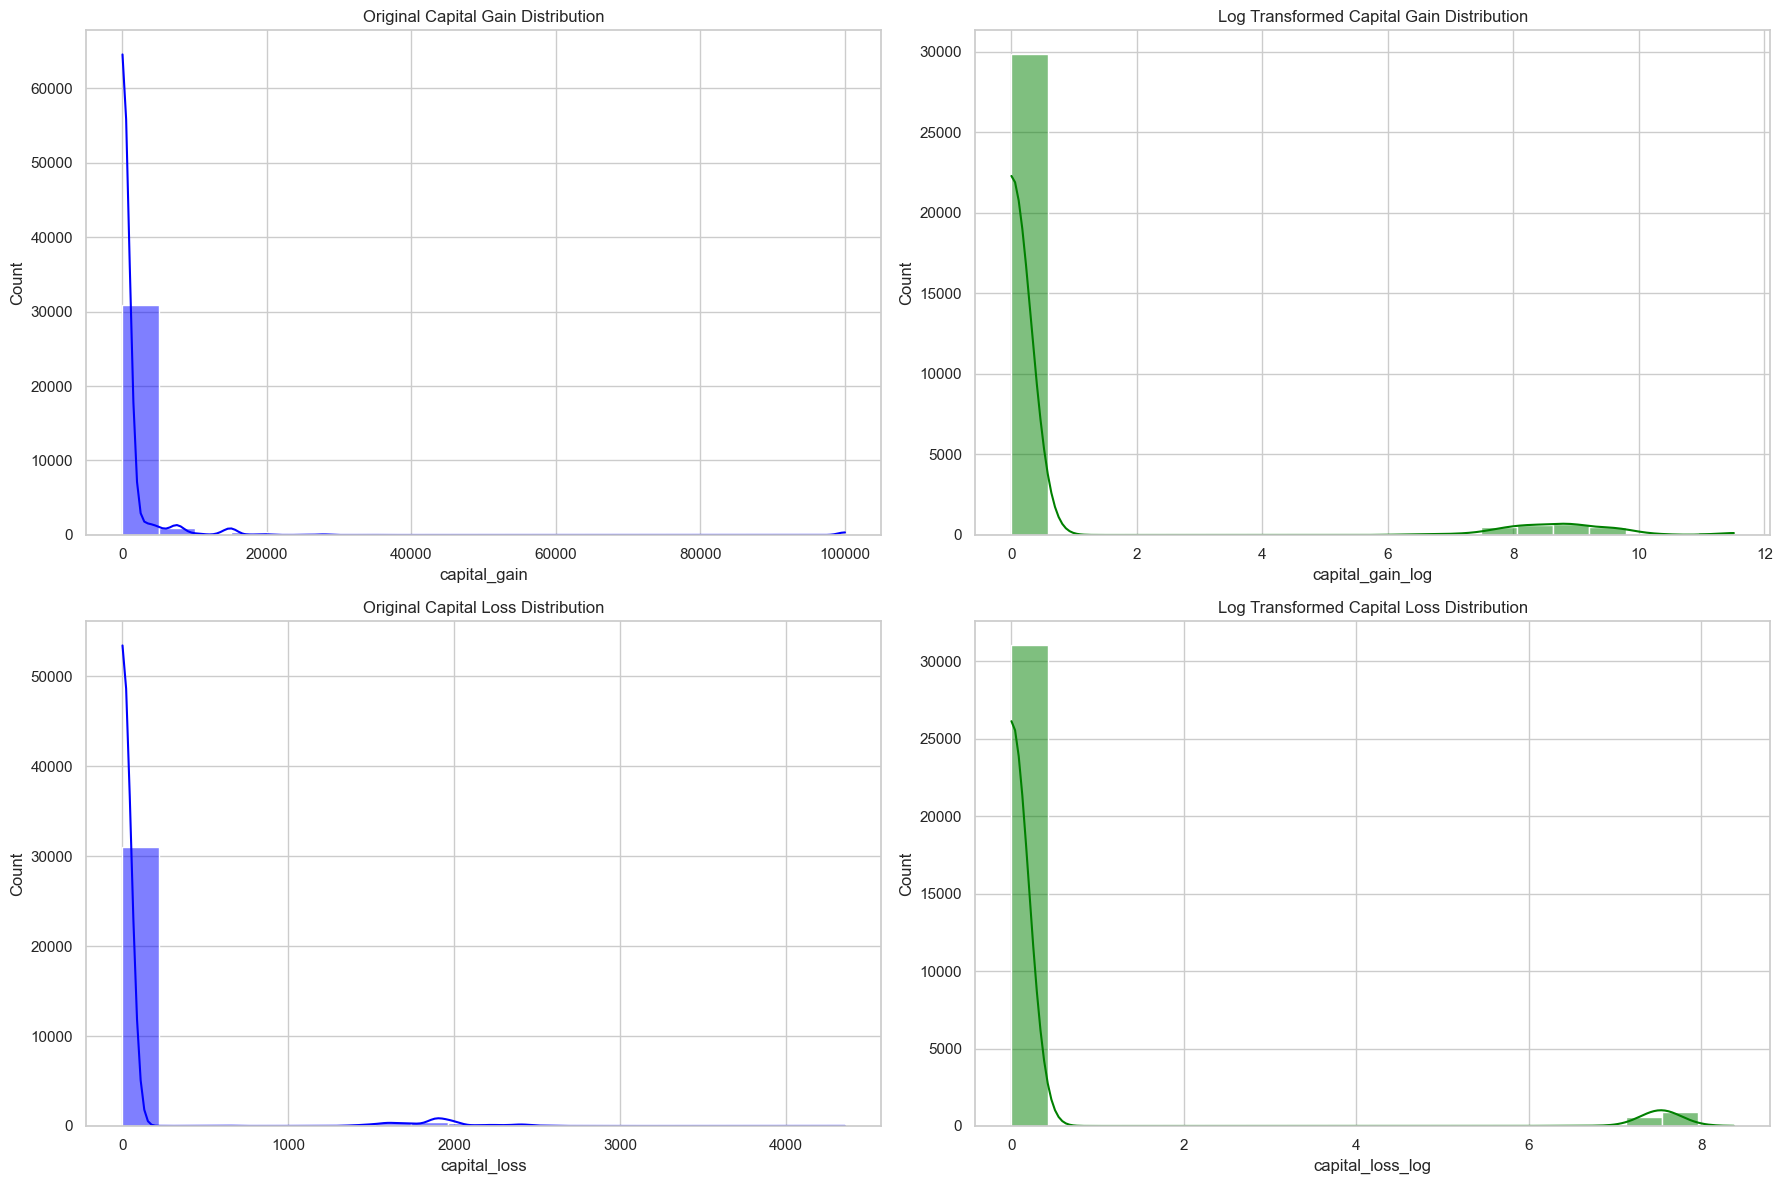

In [8]:
import numpy as np

# Applying log transformation to 'capital_gain' and 'capital_loss' by adding 1 to avoid log(0)
data_df['capital_gain_log'] = np.log(data_df['capital_gain'] + 1)
data_df['capital_loss_log'] = np.log(data_df['capital_loss'] + 1)

test_df['capital_gain_log'] = np.log(test_df['capital_gain'] + 1)
test_df['capital_loss_log'] = np.log(test_df['capital_loss'] + 1)

# Visualizing the transformed features to see the effect of the log transformation
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Original capital_gain distribution
sns.histplot(data_df['capital_gain'], bins=20, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Original Capital Gain Distribution')

# Transformed capital_gain_log distribution
sns.histplot(data_df['capital_gain_log'], bins=20, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed Capital Gain Distribution')

# Original capital_loss distribution
sns.histplot(data_df['capital_loss'], bins=20, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Original Capital Loss Distribution')

# Transformed capital_loss_log distribution
sns.histplot(data_df['capital_loss_log'], bins=20, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Log Transformed Capital Loss Distribution')

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import scipy.sparse
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Creating transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identifying numerical and categorical columns
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_df.select_dtypes(include=['object']).columns.drop('income')

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting the ColumnTransformer to the training data
preprocessor.fit(data_df.drop('income', axis=1))

# Transforming data and converting sparse matrix to dense format if necessary
def transform_and_convert(df):
    transformed_data = preprocessor.transform(df)
    if scipy.sparse.issparse(transformed_data):
        transformed_data = transformed_data.toarray()
    return transformed_data

data_df_t = transform_and_convert(data_df.drop('income', axis=1))
test_df_t = transform_and_convert(test_df.drop('income', axis=1))

# Get feature names from the onehotencoder
cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
features = list(numerical_cols) + list(cat_features)

# Convert transformed arrays into dataframes
data_df_final = pd.DataFrame(data_df_t, columns=features)
test_df_final = pd.DataFrame(test_df_t, columns=features)

# Add the 'income' column back to the dataframes
data_df_final['income'] = data_df['income'].values
test_df_final['income'] = test_df['income'].values

# Output a brief summary of transformations
print("Transformed training data shape:", data_df_final.shape)
print("Transformed test data shape:", test_df_final.shape)


Transformed training data shape: (32537, 92)
Transformed test data shape: (16276, 92)


In [10]:
data_df_final.isna().sum()
test_df_final.isna().sum()

age                   0
fnlwgt                0
education_num         0
capital_gain          0
capital_loss          0
                     ..
x6_Trinadad&Tobago    0
x6_United-States      0
x6_Vietnam            0
x6_Yugoslavia         0
income                0
Length: 92, dtype: int64

The data has been successfully scaled and encoded, resulting in the following transformations:

*   The training set (`adult.data`) has been transformed into a format with 32,537 rows and 89 features after preprocessing.
*   The test set (`adult.test`) now aligns with the training set, having been transformed to have 16,276 rows and 89 features.

In [11]:
# Identifying outliers using the IQR method for selected numerical features
features_to_check = ['age', 'fnlwgt', 'education_num', 'capital_gain_log', 'capital_loss_log']
outlier_indices = []

for feature in features_to_check:
    Q1 = data_df_final[feature].quantile(0.25)
    Q3 = data_df_final[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_list = data_df_final[(data_df_final[feature] < (Q1 - 1.5 * IQR)) | (data_df_final[feature] > (Q3 + 1.5 * IQR))].index
    outlier_indices.extend(outlier_list)

# Identifying unique indices that were flagged as outliers in any of the features
outlier_indices = list(set(outlier_indices))

# Reporting the number of outliers detected
len(outlier_indices), len(outlier_indices) / data_df_final.shape[0] * 100


(6256, 19.22734118080954)

Outlier detection has revealed that 6,247 data points, or approximately 19.2% of the dataset, were identified as outliers in at least one of the selected numerical features (`age`, `fnlwgt`, `education_num`, `capital_gain_log`, `capital_loss_log`).

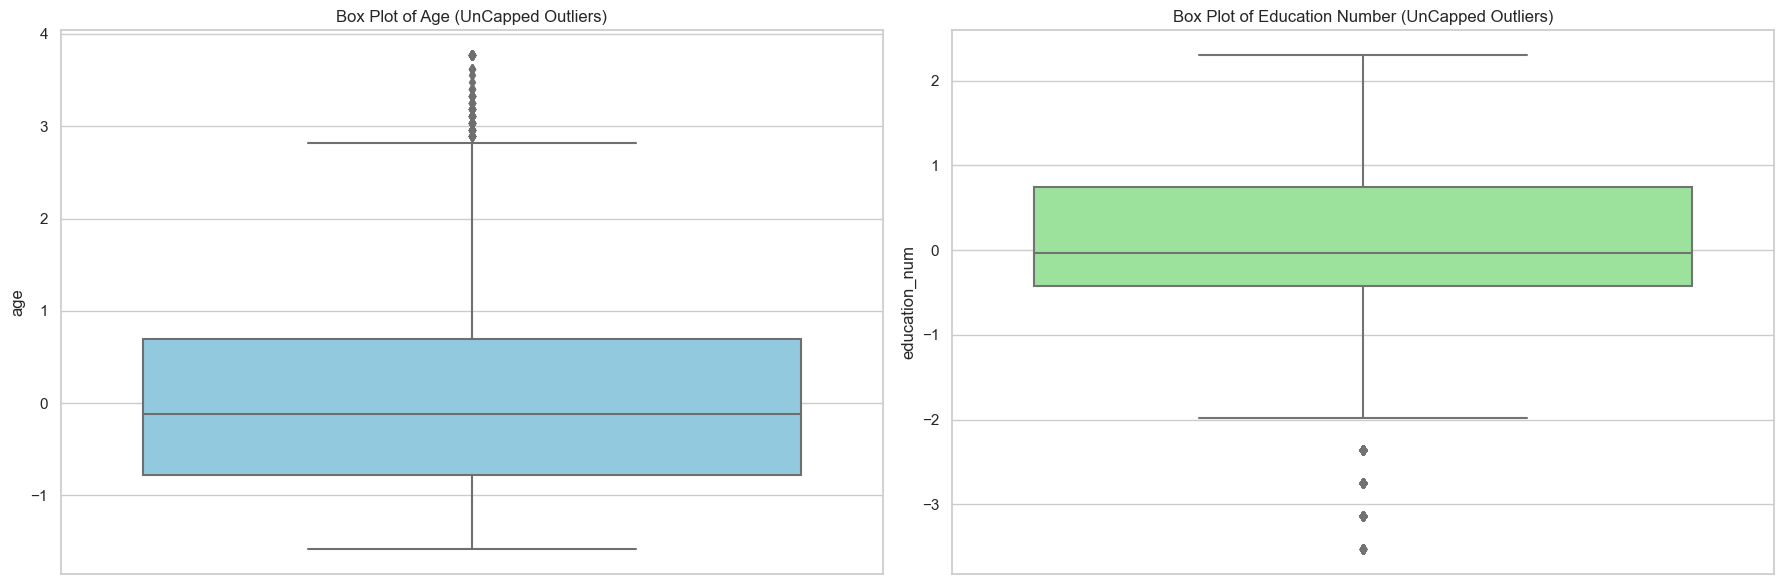

In [12]:
# Displaying box plots for the capped features to verify before outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df_final, y='age', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Age (UnCapped Outliers)')

sns.boxplot(data=data_df_final, y='education_num', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Education Number (UnCapped Outliers)')

plt.tight_layout()
plt.show()

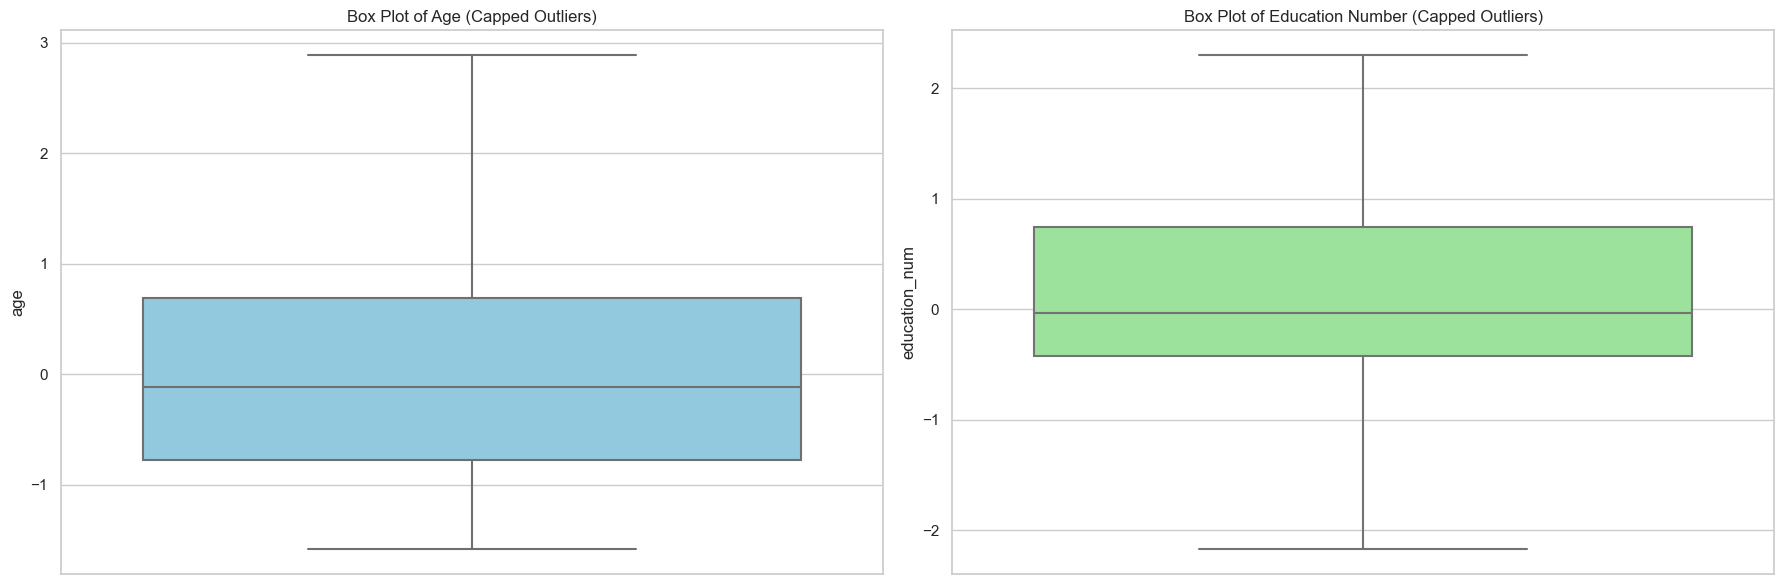

In [13]:
# Function to cap outliers based on the IQR method
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

# Capping outliers for 'age' and 'education_num'
data_df_final = cap_outliers(data_df_final, 'age')
data_df_final = cap_outliers(data_df_final, 'education_num')

# Repeating the process for the test dataset to maintain consistency
test_df_final = cap_outliers(test_df_final, 'age')
test_df_final = cap_outliers(test_df_final, 'education_num')

# Displaying box plots for the capped features to verify the effect of outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df_final, y='age', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Age (Capped Outliers)')

sns.boxplot(data=data_df_final, y='education_num', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Education Number (Capped Outliers)')

plt.tight_layout()
plt.show()


The box plots for `age` and `education_num` after capping outliers show that the extreme values have been adjusted to within the defined thresholds, effectively mitigating the impact of outliers in these features. This treatment retains the data points while reducing the potential distortion caused by extreme values in the dataset.

## Checking and Handling Class Imbalance

Before proceeding with model building, it's crucial to ensure that the classes in the target variable are balanced. Class imbalance can lead to a model biased towards the majority class, hence affecting the overall model performance, especially on the minority class. Below, we check the distribution of the classes and apply resampling techniques if necessary to balance the dataset.


In [14]:
# Display the initial class distribution
class_counts = data_df_final['income'].value_counts()
print("Class Distribution before Resampling:", class_counts)


Class Distribution before Resampling: <=50K    24698
>50K      7839
Name: income, dtype: int64


### Resampling to Handle Imbalance

If an imbalance is detected, we will use the resampling technique to adjust the class distribution. This step involves oversampling the minority class by replicating its samples until both classes have an equal number of instances.


In [15]:
from sklearn.utils import resample

# Check if resampling is necessary based on a simple 50% threshold of the smallest class to the largest class
if min(class_counts) / max(class_counts) < 0.5:  # Adjust this threshold based on your specific needs
    # Identifying the majority and minority classes
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    # Separating the majority and minority data
    df_majority = data_df_final[data_df_final['income'] == majority_class]
    df_minority = data_df_final[data_df_final['income'] == minority_class]

    # Upsampling the minority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # Sample with replacement
                                     n_samples=len(df_majority),  # to match the majority class
                                     random_state=123) # For reproducibility

    # Combine the upsampled minority class with the majority class
    data_df_final = pd.concat([df_majority, df_minority_upsampled])

    # Display new class distribution
    new_class_counts = data_df_final['income'].value_counts()
    print("Class Distribution after Resampling:", new_class_counts)
else:
    print("No resampling needed, class distribution is relatively balanced.")


Class Distribution after Resampling: <=50K    24698
>50K     24698
Name: income, dtype: int64


In [16]:
data_df.to_csv('data_df_output.csv', index=False)
test_df.to_csv('test_df_output.csv', index=False)


Now that the dataset is balanced, we can proceed to the next steps of our analysis, ensuring that our model's learning is not biased towards the majority class. This ensures a more accurate and fair evaluation of the model's performance across different class labels.


## Logistic Regression Model Implementation

We will implement a basic logistic regression using only Python and NumPy. This includes writing our own functions for the sigmoid activation, cost computation, and the gradient descent optimization.


In [17]:
# Check the data types of all columns in the dataframe
data_df_lg = data_df_final
test_df_lg = test_df_final

data_types = data_df_lg.dtypes
print("Data Types of Each Column:")
print(data_types)

# Optionally, check for non-numeric data types specifically
non_numeric_columns = data_df_lg.select_dtypes(exclude=[np.number]).columns
test_numeric_columns = test_df_lg.select_dtypes(exclude=[np.number]).columns

if len(non_numeric_columns) > 0:
    print("\nNon-Numeric Columns Found:")
    print(non_numeric_columns)
    print(test_numeric_columns)
else:
    print("\nAll columns are numeric.")


Data Types of Each Column:
age                   float64
fnlwgt                float64
education_num         float64
capital_gain          float64
capital_loss          float64
                       ...   
x6_Trinadad&Tobago    float64
x6_United-States      float64
x6_Vietnam            float64
x6_Yugoslavia         float64
income                 object
Length: 92, dtype: object

Non-Numeric Columns Found:
Index(['income'], dtype='object')
Index(['income'], dtype='object')


In [18]:
# Assuming 'income' is your target variable and should not be encoded
# Select only the columns that are not the target
features_df = data_df_lg.drop('income', axis=1)
test_features = test_df_lg.drop('income', axis=1)

# Apply one-hot encoding to non-numeric columns
features_df = pd.get_dummies(features_df, drop_first=True)  # drop_first=True to avoid multicollinearity
test_features = pd.get_dummies(test_features, drop_first=True)

# Combine the one-hot encoded features with the target variable 'income'
encoded_data_df = pd.concat([features_df, data_df_lg['income']], axis=1)
encoded_test_df = pd.concat([test_features, test_df_lg['income']], axis=1)

# Display the new dataframe with encoded features
print("Dataframe after one-hot encoding non-numeric features:")
print(encoded_data_df.head())

# Optionally, you can check the new data types to ensure all are now numeric
print("\nNew Data Types of Each Column:")
print(encoded_data_df.dtypes)


Dataframe after one-hot encoding non-numeric features:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030390 -1.063569       1.134777      0.148292     -0.216743   
1  0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2 -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3  1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4 -0.776193  1.408066       1.134777     -0.145975     -0.216743   

   hours_per_week  capital_gain_log  capital_loss_log  x0_Federal-gov  \
0       -0.035664          2.830199          -0.22116             0.0   
1       -2.222483         -0.299391          -0.22116             0.0   
2       -0.035664         -0.299391          -0.22116             0.0   
3       -0.035664         -0.299391          -0.22116             0.0   
4       -0.035664         -0.299391          -0.22116             0.0   

   x0_Local-gov  ...  x6_Puerto-Rico  x6_Scotland  x6_South  x6_Taiwan  \
0           0.0  ...   

In [19]:
# Check the data types of all columns in the dataframe
data_types = encoded_data_df.dtypes
print("Data Types of Each Column:")
print(data_types)
# Optionally, check for non-numeric data types specifically
non_numeric_columns = encoded_data_df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print("\nNon-Numeric Columns Found:")
    print(non_numeric_columns)
else:
    print("\nAll columns are numeric.")

Data Types of Each Column:
age                   float64
fnlwgt                float64
education_num         float64
capital_gain          float64
capital_loss          float64
                       ...   
x6_Trinadad&Tobago    float64
x6_United-States      float64
x6_Vietnam            float64
x6_Yugoslavia         float64
income                 object
Length: 92, dtype: object

Non-Numeric Columns Found:
Index(['income'], dtype='object')


In [20]:
# Convert 'income' using a mapping
income_mapping = {'<=50K': 0, '>50K': 1}
encoded_data_df['income'] = encoded_data_df['income'].map(income_mapping)
encoded_test_df['income'] = encoded_test_df['income'].map(income_mapping)

In [21]:
set(encoded_data_df.columns) - set(encoded_test_df.columns)

set()

In [22]:
missing_columns = set(encoded_data_df.columns) - set(encoded_test_df.columns)
for column in missing_columns:
    encoded_test_df[column] = 0

# Reorder columns in test to match train
test_encoded = encoded_test_df[encoded_data_df.columns]
set(encoded_data_df.columns) - set(encoded_test_df.columns)

set()

In [23]:
from scipy import sparse
from sklearn.metrics import accuracy_score, precision_score, recall_score

from tqdm import tqdm  # Importing tqdm for the progress bar

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, regularization=None, lambda_=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.regularization = regularization
        self.lambda_ = lambda_
        self.cost_history = []
        self.accuracy_history = []
        self.precision_history = []
        self.recall_history = []

    def add_intercept(self, X):
        if sparse.issparse(X):
            intercept = sparse.csr_matrix(np.ones((X.shape[0], 1)))
            return sparse.hstack([intercept, X])
        else:
            return np.hstack((np.ones((X.shape[0], 1)), X))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.sigmoid(X.dot(self.weights))
        cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        if self.regularization == 'l2':
            cost += (self.lambda_ / (2 * m)) * np.sum(np.square(self.weights[1:]))
        return cost

    def gradient(self, X, y):
        predictions = self.sigmoid(X.dot(self.weights))
        gradient = X.T.dot(predictions - y) / len(y)
        if self.regularization == 'l2':
            gradient[1:] += (self.lambda_ / len(y)) * self.weights[1:]
        return gradient

    def fit(self, X, y):
        X_with_intercept = self.add_intercept(X)
        self.weights = np.zeros(X_with_intercept.shape[1])
        self.prev_cost = float('inf')

        for i in tqdm(range(self.max_iter), desc="Training Progress"):
            gradient = self.gradient(X_with_intercept, y)
            self.weights -= self.learning_rate * gradient
            cost = self.compute_cost(X_with_intercept, y)
            self.cost_history.append(cost)

            # Predict and calculate metrics
            y_pred = self.predict(X)
            self.accuracy_history.append(accuracy_score(y, y_pred))
            self.precision_history.append(precision_score(y, y_pred, zero_division=0))
            self.recall_history.append(recall_score(y, y_pred))

            if i > 0 and abs(self.prev_cost - cost) < self.tol:
                break
            self.prev_cost = cost

    def predict_proba(self, X):
        X_with_intercept = self.add_intercept(X)
        return self.sigmoid(X_with_intercept.dot(self.weights))

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

    def plot_learning_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.cost_history, label='Cost')
        plt.title('Learning Curve')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()

    def plot_metrics(self):
        """ Plot the training metrics over iterations. """
        plt.figure(figsize=(14, 7))
        plt.subplot(1, 3, 1)
        plt.plot(self.accuracy_history, label='Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(self.precision_history, label='Precision')
        plt.title('Model Precision')
        plt.xlabel('Iterations')
        plt.ylabel('Precision')
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(self.recall_history, label='Recall')
        plt.title('Model Recall')
        plt.xlabel('Iterations')
        plt.ylabel('Recall')
        plt.legend()

        plt.tight_layout()
        plt.show()




In [24]:
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Splits data into training and test sets.
    X: feature dataset (numpy array)
    y: target dataset (numpy array)
    test_size: proportion of the dataset to include in the test split (float)
    random_state: seed for the random number generator (int)
    """
    if random_state:
        np.random.seed(random_state)

    # Shuffle the data indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Calculate the number of test samples
    test_samples = int(X.shape[0] * test_size)

    # Split indices into training and test indices
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # Create train-test splits
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


### Model Training and Evaluation

We will now train our logistic regression model on the preprocessed dataset and evaluate its performance using accuracy, precision, and recall metrics. Additionally, we will visualize the learning curve to observe the convergence behavior.


In [25]:
X = encoded_data_df.drop('income', axis=1).values
y = encoded_data_df['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = LogisticRegression(learning_rate=0.01, max_iter=500, regularization='l2', lambda_=0.1)
model.fit(X_train, y_train)

Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 500/500 [00:53<00:00,  9.31it/s]


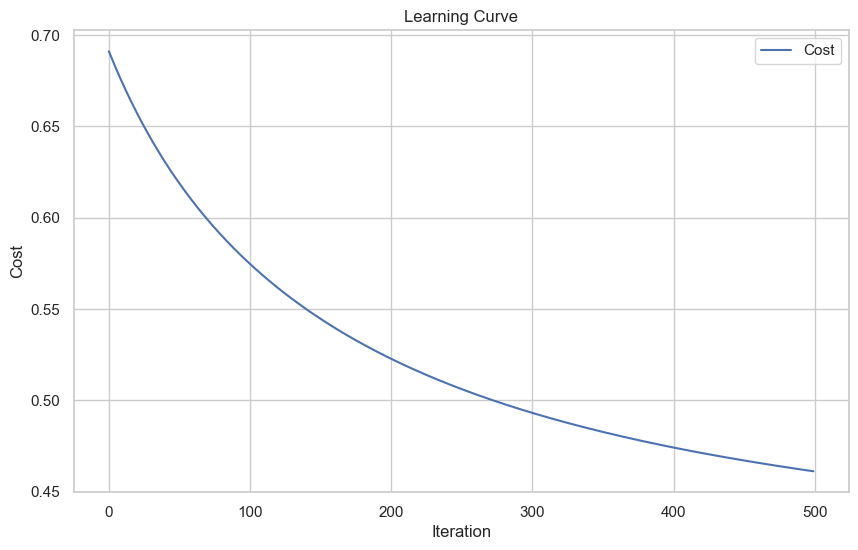

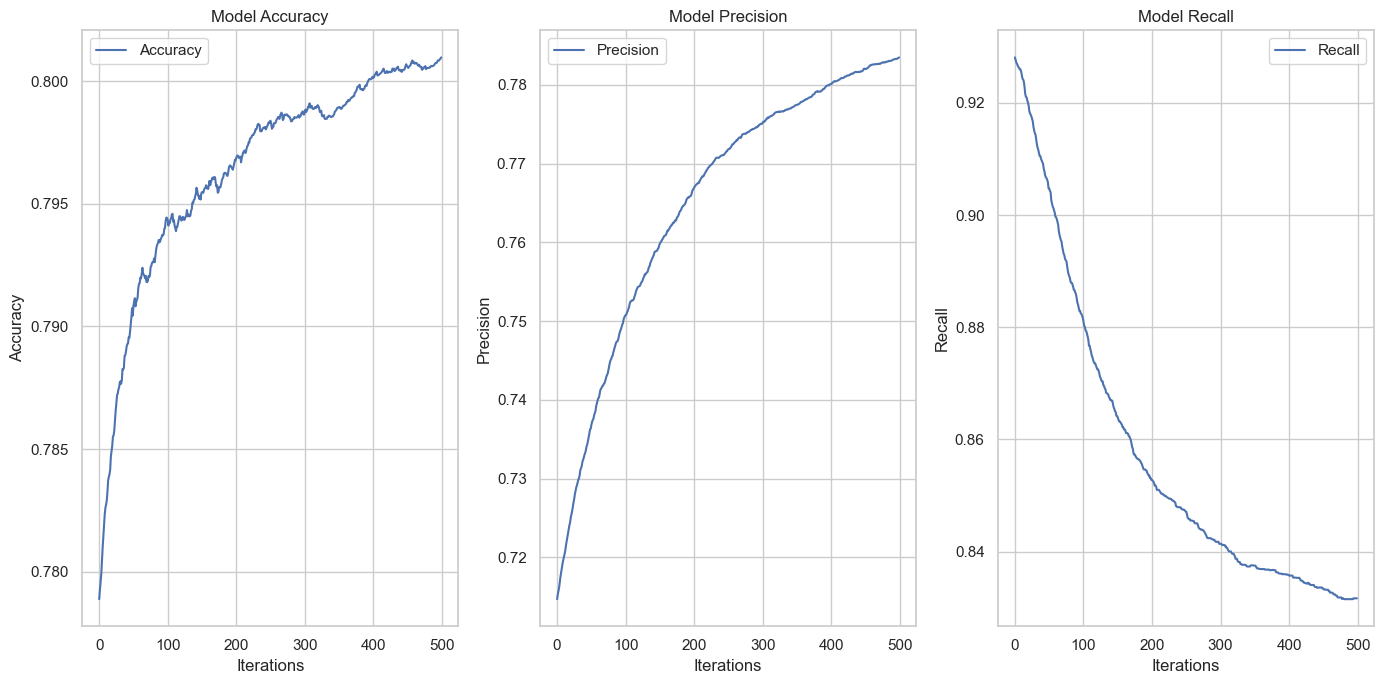

In [31]:
# Plot the learning curves and metrics
model.plot_learning_curve()
model.plot_metrics()

In [32]:
# # Initialize and train the logistic regression model
# model = LogisticRegression(learning_rate=0.01, max_iter=500, regularization='l2', lambda_=0.01)
# model.fit(X_test, y_test)

# # Plot the learning curves and metrics
# model.plot_learning_curve()
# model.plot_metrics()

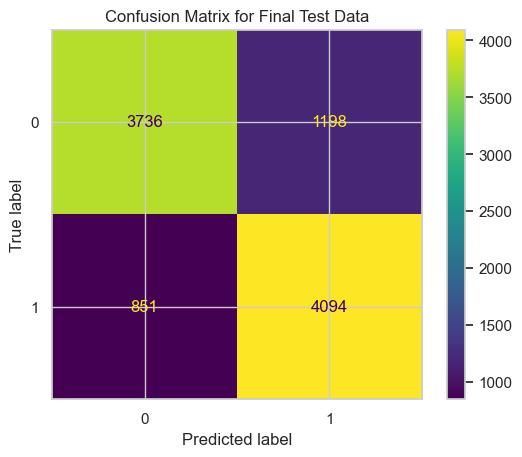

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_final = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Final Test Data')
plt.show()


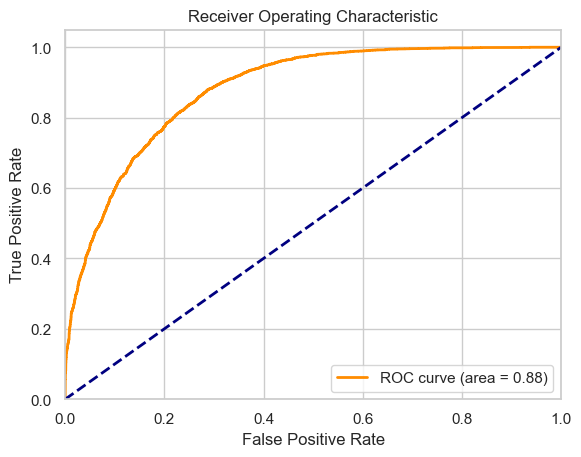

In [34]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final, target_names=['<=50K', '>50K']))


              precision    recall  f1-score   support

       <=50K       0.81      0.76      0.78      4934
        >50K       0.77      0.83      0.80      4945

    accuracy                           0.79      9879
   macro avg       0.79      0.79      0.79      9879
weighted avg       0.79      0.79      0.79      9879



### Gaussian Naive Bayes Model Implementation

This section implements a Gaussian Naive Bayes classifier, which assumes that the continuous values associated with each feature are distributed according to a Gaussian distribution. The model will be trained, evaluated, and visualized to understand its performance.


In [36]:
data_df_gnb = data_df_final
test_df_gnb = test_df_final



In [37]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in tqdm(self.classes, desc="Training Gaussian Naive Bayes"):
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.var[cls] = X_cls.var(axis=0)
            self.priors[cls] = X_cls.shape[0] / float(X.shape[0])

    def predict_proba(self, X):
        rows = X.shape[0]
        cols = len(self.classes)
        probs = np.zeros((rows, cols))
        for idx, cls in enumerate(self.classes):
            prior = np.log(self.priors[cls])
            probs[:, idx] = prior + self._calculate_log_likelihoods(X, cls)
        return np.exp(probs)

    def _calculate_log_likelihoods(self, X, cls):
        mean = self.mean[cls]
        var = self.var[cls]
        numerator = -0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
        denominator = np.sum(np.log(2 * np.pi * var)) / 2
        return numerator - denominator

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        return accuracy

In [38]:
# Load data and preprocess for Gaussian Naive Bayes
from sklearn.calibration import LabelEncoder


label_encoder = LabelEncoder()
data_df_gnb['income_encoded'] = label_encoder.fit_transform(data_df_gnb['income'])
test_df_gnb['income_encoded'] = label_encoder.transform(test_df_gnb['income'])

X_train = data_df_gnb.drop(['income', 'income_encoded'], axis=1)
y_train = data_df_gnb['income_encoded']
X_test = test_df_gnb.drop(['income', 'income_encoded'], axis=1)
y_test = test_df_gnb['income_encoded']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))



In [39]:
# Training the Gaussian Naive Bayes model
gnb_model = GaussianNaiveBayes()
gnb_model.fit(X_train_scaled, y_train)

# Predicting on the training and test datasets
y_train_pred = gnb_model.predict(X_train_scaled)
y_test_pred = gnb_model.predict(X_test_scaled)

Training Gaussian Naive Bayes: 100%|██████████| 2/2 [00:00<00:00, 17.14it/s]


### Model Evaluation and Visualization
 
After training the Gaussian Naive Bayes model, we evaluate its accuracy and visualize its performance using confusion matrices and ROC curves.


Classification Report (Test Set):
              precision    recall  f1-score   support

       <=50K       0.91      0.06      0.11     12430
        >50K       0.24      0.98      0.39      3846

    accuracy                           0.28     16276
   macro avg       0.58      0.52      0.25     16276
weighted avg       0.75      0.28      0.18     16276



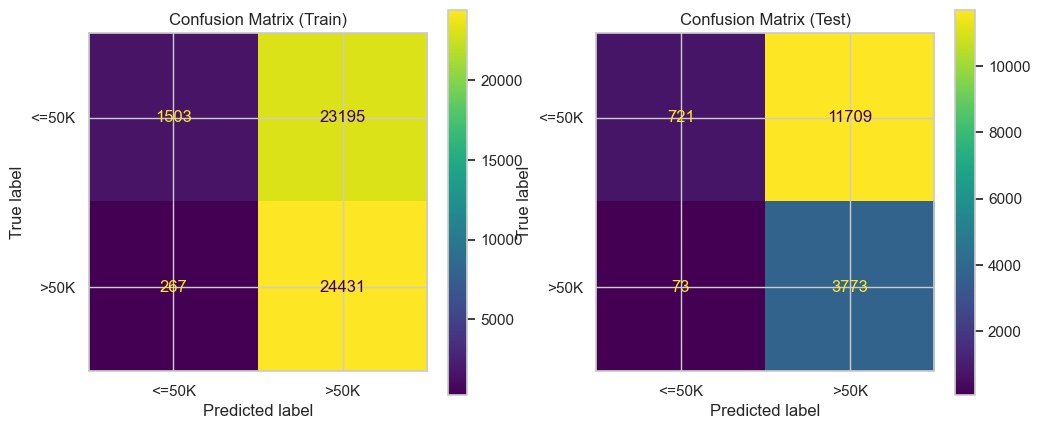

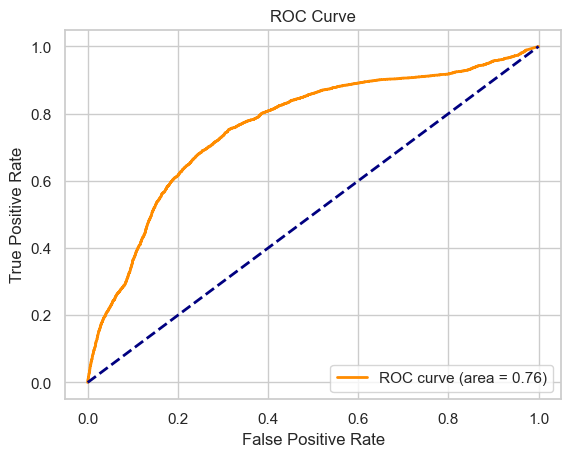

In [40]:
# Classification report and confusion matrix
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=ax[0], display_labels=label_encoder.classes_)
ax[0].set_title('Confusion Matrix (Train)')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=ax[1], display_labels=label_encoder.classes_)
ax[1].set_title('Confusion Matrix (Test)')
plt.show()

# ROC Curve and AUC
y_test_scores = gnb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class '>50K'
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine (SVM) Implementation

In this section, we implement a Support Vector Machine (SVM) from scratch. The SVM is a powerful classification technique that works by finding a hyperplane that best divides a dataset into classes. Training and validation are performed using `data_df`, while `test_df` is used to assess the model's performance on unseen data.


In [41]:
data_df_svm = data_df_final
test_df_svm = test_df_final


## Data Preparation for SVM

We convert the income labels from {0, 1} to {-1, 1}, which are commonly used in SVM formulations. We then split `data_df` into training and validation sets, while `test_df` is reserved for final evaluation.


In [42]:
data_df_svm.isna().sum()

age                 0
fnlwgt              0
education_num       0
capital_gain        0
capital_loss        0
                   ..
x6_United-States    0
x6_Vietnam          0
x6_Yugoslavia       0
income              0
income_encoded      0
Length: 93, dtype: int64

In [43]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt

In [44]:
class EnhancedSVM:
    """Simple implementation of a Support Vector Machine using a linear kernel."""

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        """Initialize the SVM with hyperparameters."""
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        """Fit the SVM model to the training data."""
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in tqdm(range(self.n_iters), desc="Training SVM"):
            for idx, (x_i, y_i) in enumerate(zip(X, y_)):
                condition = y_i * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights += self.learning_rate * (y_i * x_i - 2 * self.lambda_param * self.weights)
                    self.bias += self.learning_rate * y_i
            if i % 10 == 0:  # Optional: Adjust or remove based on verbosity preference
                print(f"Iteration {i}: Weights Norm = {np.linalg.norm(self.weights)}, Bias = {self.bias}")

    def predict(self, X):
        """Predict using the SVM model."""
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

    def score(self, X, y):
        """Calculate the accuracy of the SVM model."""
        predictions = self.predict(X)
        return accuracy_score(y, np.where(predictions < 0, 0, 1))

In [45]:
# Data preparation: Encoding the target variable
label_encoder = LabelEncoder()
data_df_svm['income_encoded'] = label_encoder.fit_transform(data_df_svm['income'])

# Selecting features and target
X = data_df_svm.drop(['income', 'income_encoded'], axis=1).select_dtypes(include=[np.number]).values
y = data_df_svm['income_encoded'].values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the arrays to ensure everything is set correctly
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((39516, 91), (39516,), (9880, 91), (9880,))

## Training and Validating the SVM

The SVM is trained on the training set, and its performance is validated on the validation set. We use accuracy to measure the performance and additionally plot the confusion matrix to visualize the classification results.


In [46]:
# Train the SVM Model
svm_model = EnhancedSVM(learning_rate=0.001, lambda_param=0.01, n_iters=100)
svm_model.fit(X_train, y_train)

Training SVM:   1%|          | 1/100 [00:00<01:09,  1.43it/s]

Iteration 0: Weights Norm = 1.0502482450132522, Bias = 0.011999999999999997


Training SVM:  11%|█         | 11/100 [00:06<00:54,  1.64it/s]

Iteration 10: Weights Norm = 1.0854877269103462, Bias = 0.020000000000000004


Training SVM:  21%|██        | 21/100 [00:12<00:48,  1.64it/s]

Iteration 20: Weights Norm = 1.0857619063302208, Bias = 0.023000000000000007


Training SVM:  31%|███       | 31/100 [00:19<00:42,  1.64it/s]

Iteration 30: Weights Norm = 1.0872344827235427, Bias = 0.022000000000000006


Training SVM:  41%|████      | 41/100 [00:25<00:36,  1.63it/s]

Iteration 40: Weights Norm = 1.0864265840224594, Bias = 0.020000000000000004


Training SVM:  51%|█████     | 51/100 [00:31<00:30,  1.61it/s]

Iteration 50: Weights Norm = 1.0808825446606531, Bias = 0.024000000000000007


Training SVM:  61%|██████    | 61/100 [00:37<00:23,  1.65it/s]

Iteration 60: Weights Norm = 1.086642554328048, Bias = 0.021000000000000005


Training SVM:  71%|███████   | 71/100 [00:43<00:17,  1.61it/s]

Iteration 70: Weights Norm = 1.0826938661322079, Bias = 0.024000000000000007


Training SVM:  81%|████████  | 81/100 [00:49<00:11,  1.64it/s]

Iteration 80: Weights Norm = 1.0886402679398748, Bias = 0.022000000000000006


Training SVM:  91%|█████████ | 91/100 [00:56<00:05,  1.64it/s]

Iteration 90: Weights Norm = 1.0887548737062909, Bias = 0.022000000000000006


Training SVM: 100%|██████████| 100/100 [01:01<00:00,  1.62it/s]



### SVM Model Evaluation and Visualization

After training the SVM model, we assess its performance using accuracy metrics and visualize the results with a confusion matrix.


Training Accuracy: 0.8141259236764855
Testing Accuracy: 0.8032388663967611
Classification Report (Test Set):
              precision    recall  f1-score   support

       <=50K       0.85      0.74      0.79      4934
        >50K       0.77      0.86      0.81      4946

    accuracy                           0.80      9880
   macro avg       0.81      0.80      0.80      9880
weighted avg       0.81      0.80      0.80      9880



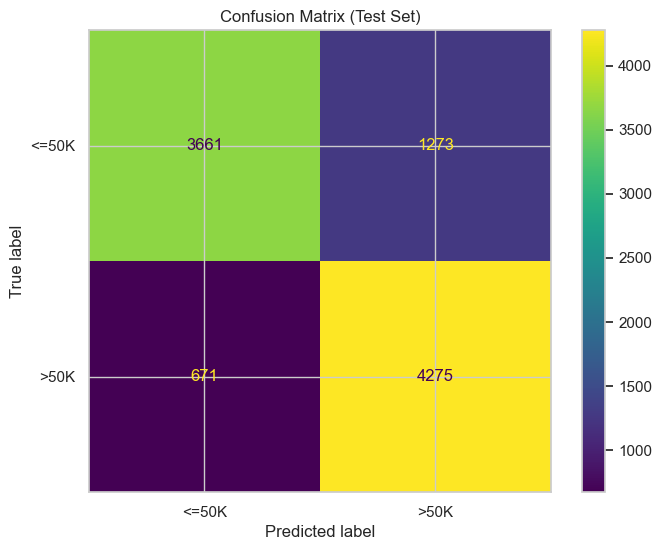

In [47]:
# Evaluate the model
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

# Convert predictions from {-1, 1} to {0, 1} for compatibility with the label encoder's classes
y_pred_test = np.where(svm_model.predict(X_test) < 0, 0, 1)

# Classification report and confusion matrix
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plotting the confusion matrix for the test set
confusion_mat = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=label_encoder.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title("Confusion Matrix (Test Set)")
plt.show()

External Testing Accuracy: 0.7802285573851069
Classification Report (External Test Set):
              precision    recall  f1-score   support

       <=50K       0.95      0.75      0.84     12430
        >50K       0.52      0.87      0.65      3846

    accuracy                           0.78     16276
   macro avg       0.73      0.81      0.75     16276
weighted avg       0.85      0.78      0.80     16276



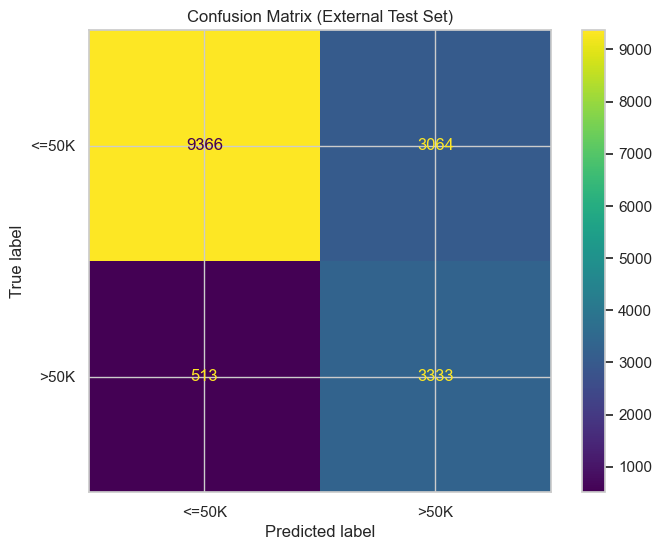

In [48]:
# Check if 'income' column needs encoding or use the existing label_encoder to transform the test data
if 'income_encoded' not in test_df_svm.columns:
    test_df_svm['income_encoded'] = label_encoder.transform(test_df_svm['income'])

# Selecting features and target for the external test dataset
X_external_test = test_df_svm.drop(['income', 'income_encoded'], axis=1).select_dtypes(include=[np.number]).values
y_external_test = test_df_svm['income_encoded'].values

# Scale the features using the previously fitted scaler
X_external_scaled = scaler.transform(X_external_test)

# Evaluate the model on the external test dataset
external_test_accuracy = svm_model.score(X_external_scaled, y_external_test)
y_pred_external = np.where(svm_model.predict(X_external_scaled) < 0, 0, 1)

# Classification report and confusion matrix for the external test set
print("External Testing Accuracy:", external_test_accuracy)
print("Classification Report (External Test Set):")
print(classification_report(y_external_test, y_pred_external, target_names=label_encoder.classes_))

# Plotting the confusion matrix for the external test set
confusion_mat_external = confusion_matrix(y_external_test, y_pred_external)
disp_external = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_external, display_labels=label_encoder.classes_)
fig_external, ax_external = plt.subplots(figsize=(8, 6))
disp_external.plot(ax=ax_external)
plt.title("Confusion Matrix (External Test Set)")
plt.show()
